In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [49]:
ev_info = pd.read_csv('../raw_data/ev_info.csv', index_col='Unnamed: 0')

In [101]:
roic = pd.read_csv('../raw_data/ROIC.csv', index_col='Unnamed: 0')

In [103]:
roic['date'] = pd.to_datetime(roic['date'])

roic_2019 = roic[roic['date'] >= '2019-01-01']

roic_2019 = roic_2019[roic_2019['date'] < '2020-01-01']

In [115]:
financials = pd.read_csv('../raw_data/company_IS.csv', index_col='Unnamed: 0')

financials['date'] = pd.to_datetime(financials['date'])

df = financials[financials['date'] >= '2019-01-01']

df =df[df['date'] < '2020-01-01']

In [116]:
df

,date,symbol,revenue,grossProfit,ebitda
0,2019-12-31,CMCSA,1.089420e+11,7.450200e+10,3.425000e+10
0,2019-12-31,KMI,1.320900e+10,7.535000e+09,6.435000e+09
1,2019-12-28,INTC,7.196500e+10,4.214000e+10,3.537300e+10
1,2019-08-29,MU,2.340600e+10,1.070200e+10,1.256800e+10
1,2019-12-31,GE,9.521500e+10,2.265500e+10,9.922000e+09
...,...,...,...,...,...
0,2019-12-31,AEI,2.425795e+07,4.289196e+06,-1.404377e+06
0,2019-12-31,AUUD,4.588260e+05,-5.525750e+05,-3.111802e+06
0,2019-12-31,DM,3.458200e+07,1.370800e+07,-6.900000e+04
0,2019-12-31,HLFFF,1.809000e+09,1.168500e+09,4.760000e+07


In [3]:
df = pd.read_csv('../raw_data/100_russel_3000.csv')

In [4]:
# Select columns
df = df[['symbol','date', 'ebitda', 'grossProfit', 'revenue']]

In [5]:
#df[['EBITDA',...]] = df[['EBITDA',...]].apply(lambda x: x/1_000_000)

In [117]:
# Convert into millions USD
df['ebitda'] = df['ebitda']/1_000_000
df['grossProfit'] = df['grossProfit']/1_000_000
df['revenue'] = df['revenue']/1_000_000
# df['totalCash'] = df['totalCash']/1_000_000
# df['totalDebt'] = df['totalDebt']/1_000_000

# Variable Distributions

## EBITDA

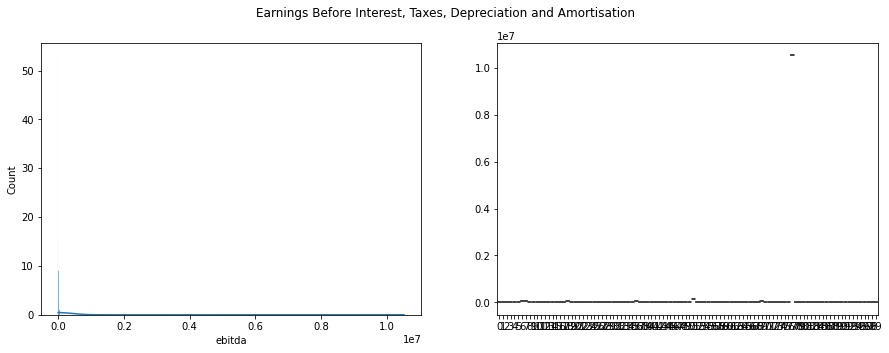

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['ebitda'][:100], kde=True, ax=axs[0])
sns.boxplot(data=df['ebitda'][:100], ax=axs[1])
fig.suptitle('Earnings Before Interest, Taxes, Depreciation and Amortisation')
plt.show()

## Gross Profit

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['grossProfit'][:500], kde=True, ax=axs[0])
sns.boxplot(data=df['grossProfit'][:500], ax=axs[1])
fig.suptitle('Gross Profit')
plt.show()

## Revenue

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['revenue'][:500], kde=True, ax=axs[0])
sns.boxplot(data=df['revenue'][:500], ax=axs[1])
fig.suptitle('Revenue')
plt.show()

## CAGR

In [12]:
df['last_year_revenue'] = df['revenue'].shift(-1)

revenue_growth = df[df.reset_index()['index'] % 2 == 0].reset_index().drop(columns=['index'])

revenue_growth['cagr'] = 100 * (revenue_growth['revenue'] - revenue_growth['last_year_revenue'])/revenue_growth['last_year_revenue']

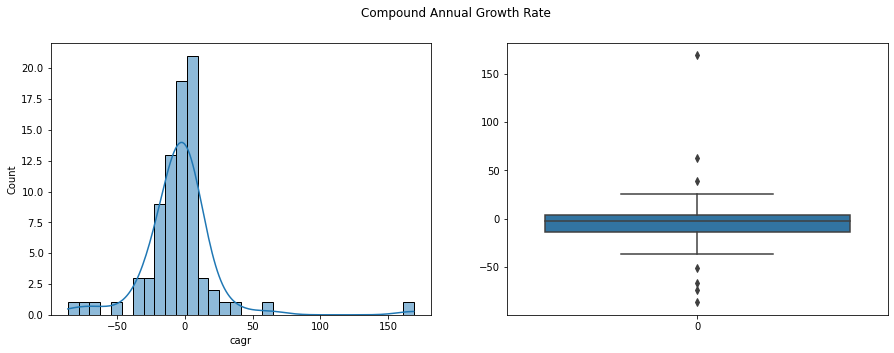

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(revenue_growth['cagr'], kde=True, ax=axs[0])
sns.boxplot(data=revenue_growth['cagr'], ax=axs[1])
fig.suptitle('Compound Annual Growth Rate')
plt.show()

## Return On Invested Capital

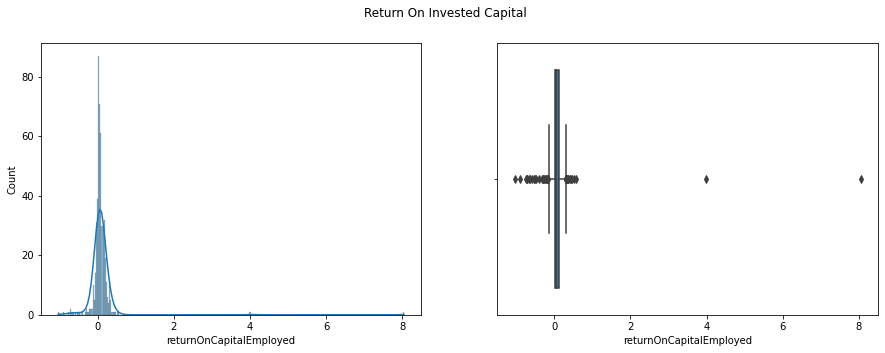

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(roic_2019['returnOnCapitalEmployed'][:500], kde=True, ax=axs[0])
sns.boxplot(x=roic_2019['returnOnCapitalEmployed'][:500], ax=axs[1])
fig.suptitle('Return On Invested Capital')
plt.show()

## Enterprise Value

In [98]:
selected =ev_info[ev_info['enterpriseValue (m)'] < 10000]

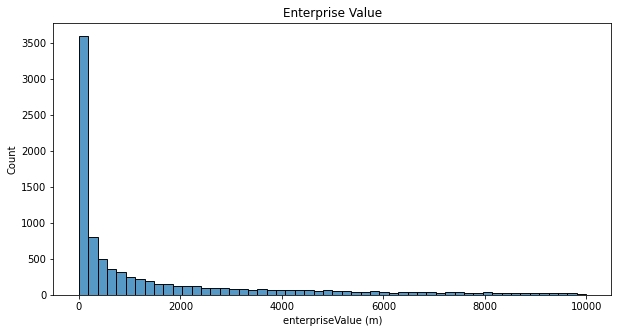

In [100]:
fig = plt.figure(figsize=(10,5))
sns.histplot(selected['enterpriseValue (m)'])
plt.title('Enterprise Value');

# Correlations

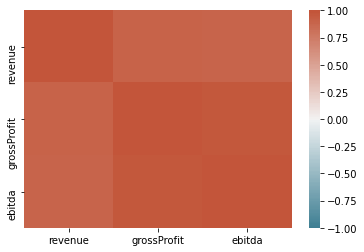

In [120]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(220, 20, n=200))
plt.show()

# Top 10s

## Growth

In [121]:
sns.barplot(x=df.sort_values(by='cagr', ascending=False).head(10)['symbol'], y=revenue_growth.sort_values(by='cagr', ascending=False).head(10)['cagr'])
plt.title('Top 10 Biggest Growing Companies')
plt.show()

KeyError: 'cagr'

## Revenue

In [ ]:
pre_covid = df[df.reset_index()['index'] % 2 != 0].reset_index().drop(columns=['index', 'last_year_revenue', 'cagr'])

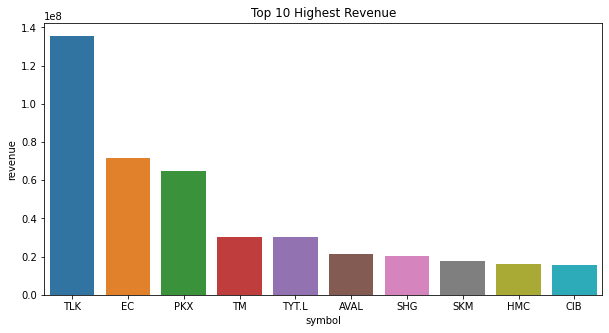

In [125]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df.sort_values(by='revenue', ascending=False).head(10)['symbol'], y=df.sort_values(by='revenue', ascending=False).head(10)['revenue'])
plt.title('Top 10 Highest Revenue')
plt.show()

## Profit

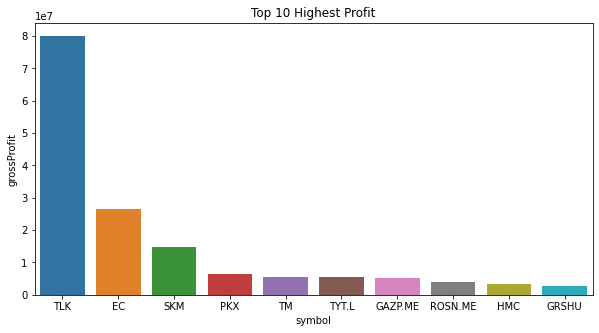

In [124]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df.sort_values(by='grossProfit', ascending=False).head(10)['symbol'], y=df.sort_values(by='grossProfit', ascending=False).head(10)['grossProfit'])
plt.title('Top 10 Highest Profit')
plt.show()

# Categorical features

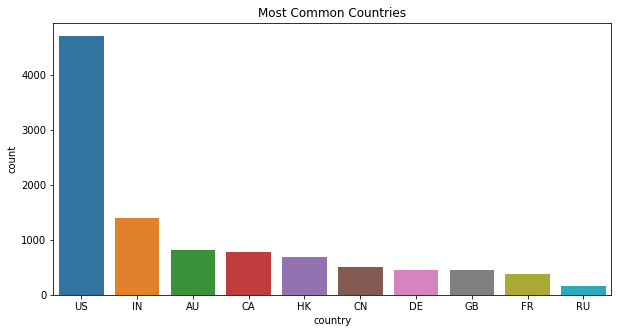

In [126]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x=ev_info['country'], order=pd.value_counts(ev_info['country']).iloc[:10].index)
plt.title('Most Common Countries');

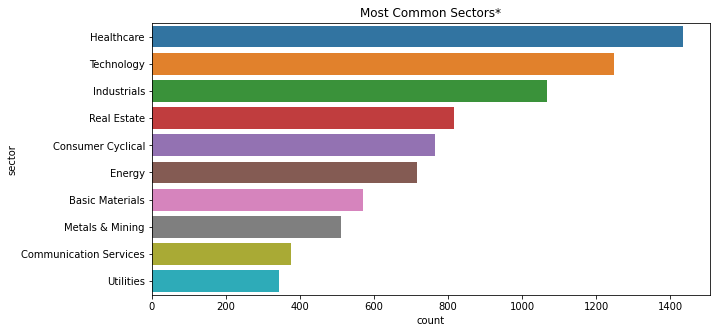

In [39]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y=ev_info['sector'], order=pd.value_counts(ev_info['sector']).iloc[:10].index)
plt.title('Most Common Sectors*');

*Financial sector has been removed because it's not valued in the same way, because its revenue comes from interest payments

# Word Cloud

In [94]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 2000000000,
        max_font_size = 40,
        scale = 3
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()

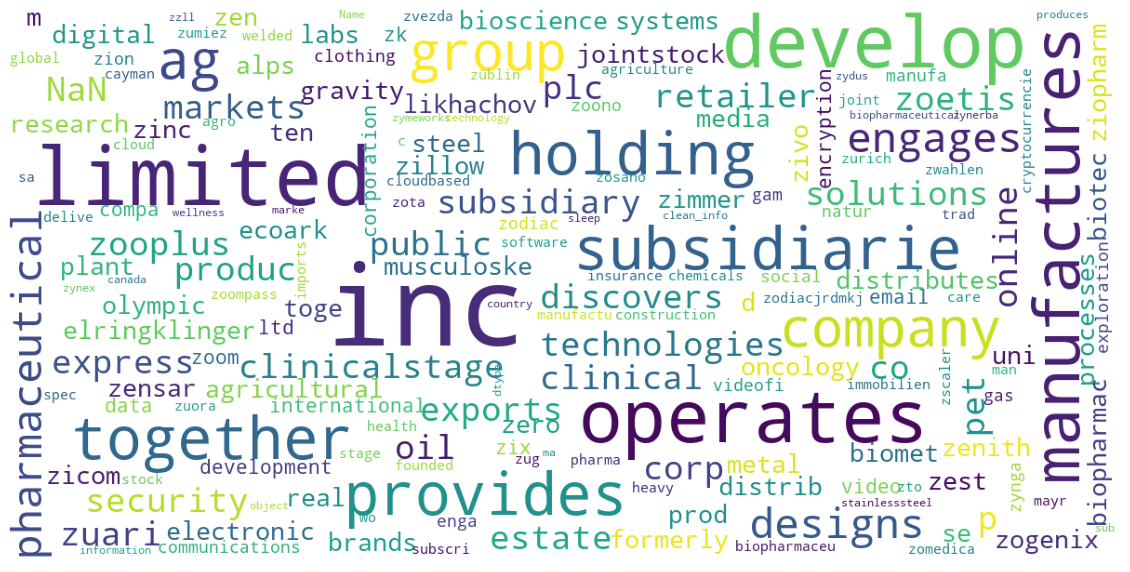

In [95]:
show_wordcloud(ev_info.tail(50)['clean_info'])